# Testing different estimators

In this notebook we wil test different possible estimators for 
combining several measurements of Hubble's constant $H_0$.

We would like to know which of the following estimators 
gives better performance (in general, performance means low variance).

Team 1. uses as an estimator the first avilable measurment and discards the rest:

$\hat{H}_1=H_{0,1}$

Team 2. uses as an estimator the sample average of the available measurements:

$\hat{H}_2=1/N\sum_i H_{0,i}$

Team 3. uses the inverse of the mean of the inverse of the available measurements:

$\hat{H}_3=\frac{1}{1/N\sum_i1/H_{0,i}}$

Team 4. uses the ninth available measruement:

$\hat{H}_4=H_{0,8}$

Finally, team 5. uses the inverse-variance weighted mean:

$\hat{H}_5=\frac{1}{\sum_i 1/\sigma_i^2}\sum\frac{H_{0,i}}{\sigma_i^2}$

Let's use a Monte Carlo method to decide which one is best!

In [4]:
## This line will make plots appear inline
%matplotlib inline
## other useful modules
import scipy
import random
from scipy import random

In [5]:
## We will do NMC realizations, and put the value of
## each estimator in a variable H1,...,H5
NMC=1000
H1=scipy.zeros(NMC)
H2=scipy.zeros(NMC)
H3=scipy.zeros(NMC)
H4=scipy.zeros(NMC)
H5=scipy.zeros(NMC)


In [6]:
## let's assume we have 10 measurements in each realization
N_measurements=10
H0 = 70. ## fiducial value km/s/Mpc
## these are the uncertaintied in each measurement
## choses in a completely arbitrary way
sigma = scipy.array([1., 2., 6., 6., 5., 9., 2., 8., 15., 0.5])
for i in range(NMC):
    H = H0 + sigma*random.randn(N_measurements) ## this is an array of 10 entries
    H1[i] = H[0] ## get the first element
    H2[i] = scipy.mean(H)
    H3[i] = 1/scipy.mean(1/H)
    H4[i] = H[8] ## get the eight element
    H5[i] = scipy.sum(H/sigma**2)/scipy.sum(1/sigma**2)

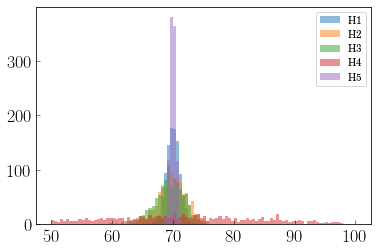

In [7]:
## do the histograms
hist(H1, bins=100, alpha=0.5, linewidth=0, range=(50,100), label="H1")
hist(H2, bins=100, alpha=0.5, linewidth=0, range=(50,100), label="H2")
hist(H3, bins=100, alpha=0.5, linewidth=0, range=(50,100), label="H3")
hist(H4, bins=100, alpha=0.5, linewidth=0, range=(50,100), label="H4")
hist(H5, bins=100, alpha=0.5, linewidth=0, range=(50,100), label="H5")
legend()

In [8]:
## print the means and variances
print "mean(H1): {} STD(H1): {}".format(scipy.mean(H1),scipy.std(H1))
print "mean(H2): {} STD(H2): {}".format(scipy.mean(H2),scipy.std(H2))
print "mean(H3): {} STD(H3): {}".format(scipy.mean(H3),scipy.std(H3))
print "mean(H4): {} STD(H4): {}".format(scipy.mean(H4),scipy.std(H4))
print "mean(H5): {} STD(H5): {}".format(scipy.mean(H5),scipy.std(H5))



mean(H1): 70.0178511388 STD(H1): 1.07188166178
mean(H2): 70.0127406018 STD(H2): 2.26094598857
mean(H3): 69.3450578798 STD(H3): 2.50177352734
mean(H4): 69.9590317306 STD(H4): 15.3009257111
mean(H5): 69.9887199686 STD(H5): 0.438059151021


great!! Team 5. has the lowest variance estimator!